#heading 1

First few rows of the dataset:


,response_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,promotions_count,...,dependents_count,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,exit_status
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989.0,Good,High,High,1,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,NaN,NaN,Average,0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59611 entries, 0 to 59610
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   response_id               59611 non-null  int64  
 1   age                       59611 non-null  int64  
 2   gender                    59611 non-null  object 
 3   years_at_company          59611 non-null  int64  
 4   job_role                  59611 non-null  object 
 5   monthly_income            57811 non-null  float64
 6   work_life_balance         49467 non-null  object 
 7   job_satisfaction          52447 non-null  object 
 8   performance_rating        59611 non-null  object 
 9   promotions_count          59611 non-null  int64  
 10  overtime                  59611 non-null  object 
 11  distance_from_home        59611 non-null  int64  
 12  education_level           59611 non-null  object 
 13  marital_status            59611 non-null  obje

,response_id,age,years_at_company,monthly_income,promotions_count,distance_from_home,dependents_count,company_tenure
count,59611.000000,59611.000000,59611.000000,57811.000000,59611.000000,59611.000000,54831.000000,55427.000000
mean,37224.692171,38.562497,15.752630,7311.070350,0.832514,50.024912,1.648465,55.772909
std,21519.598309,12.082500,11.245724,2197.444033,0.994987,28.519542,1.555767,25.395430
min,1.000000,6.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18576.000000,28.000000,7.000000,5661.000000,0.000000,25.000000,0.000000,36.000000
50%,37207.000000,39.000000,13.000000,7358.000000,1.000000,50.000000,1.000000,56.000000
75%,55874.500000,49.000000,23.000000,8882.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,56050.000000,4.000000,297.000000,6.000000,128.000000



Checking for missing values:
response_id                     0
age                             0
gender                          0
years_at_company                0
job_role                        0
monthly_income               1800
work_life_balance           10144
job_satisfaction             7164
performance_rating              0
promotions_count                0
overtime                        0
distance_from_home              0
education_level                 0
marital_status                  0
dependents_count             4780
job_level                       0
company_size                 2992
company_tenure               4184
remote_work                     0
leadership_opportunities        0
innovation_opportunities        0
company_reputation              0
employee_recognition            0
exit_status                     0
dtype: int64


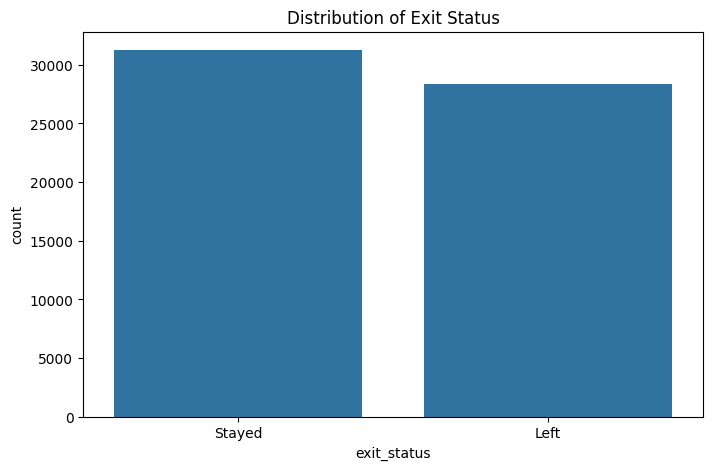

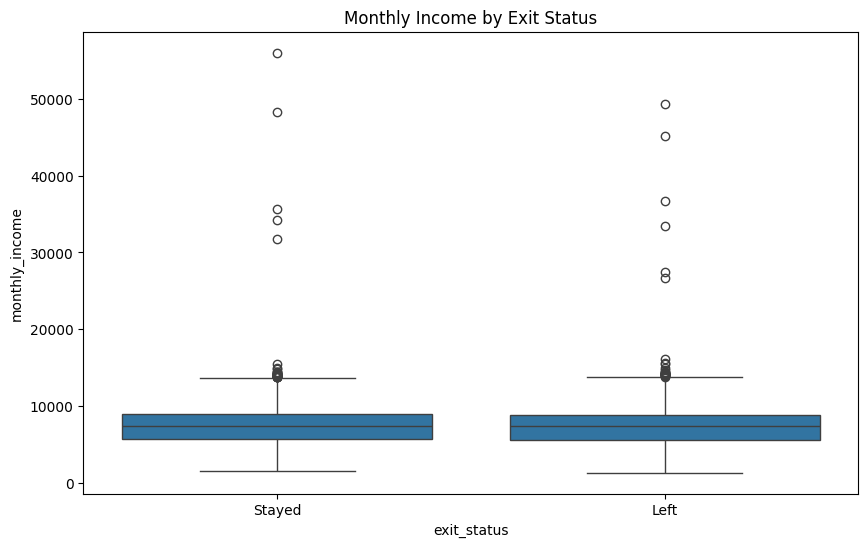

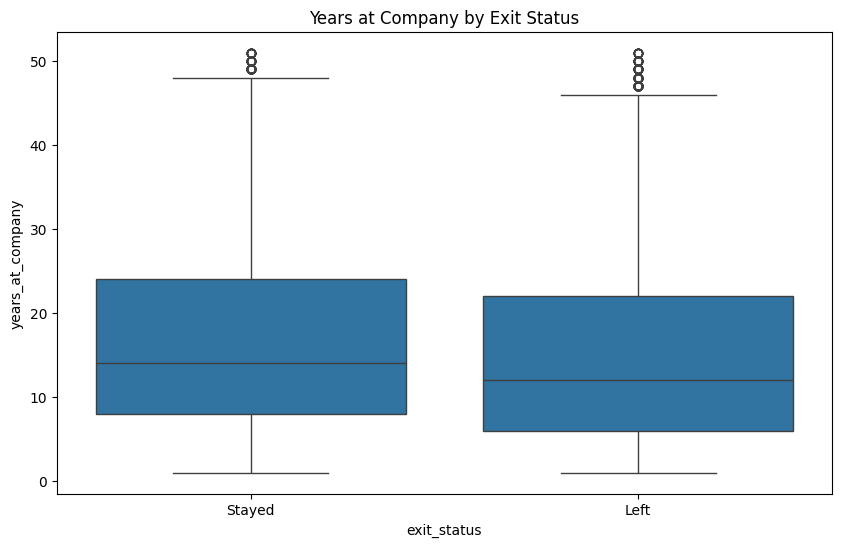

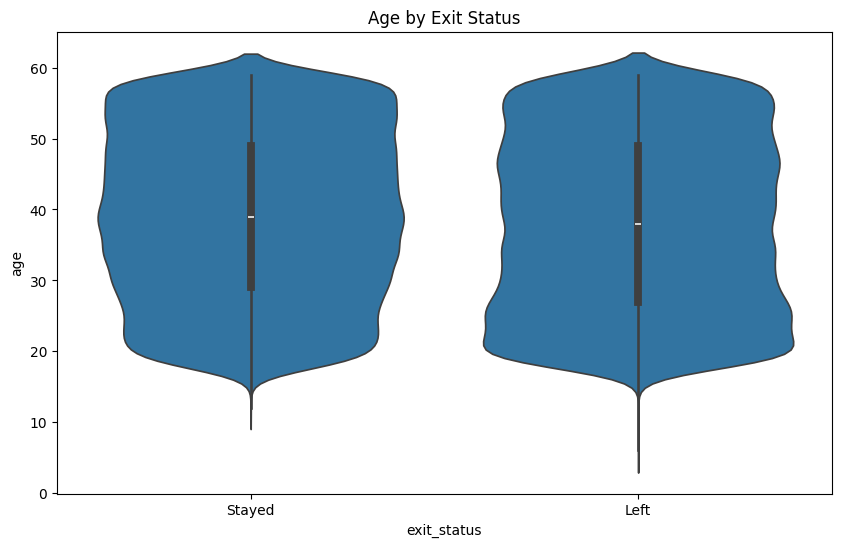

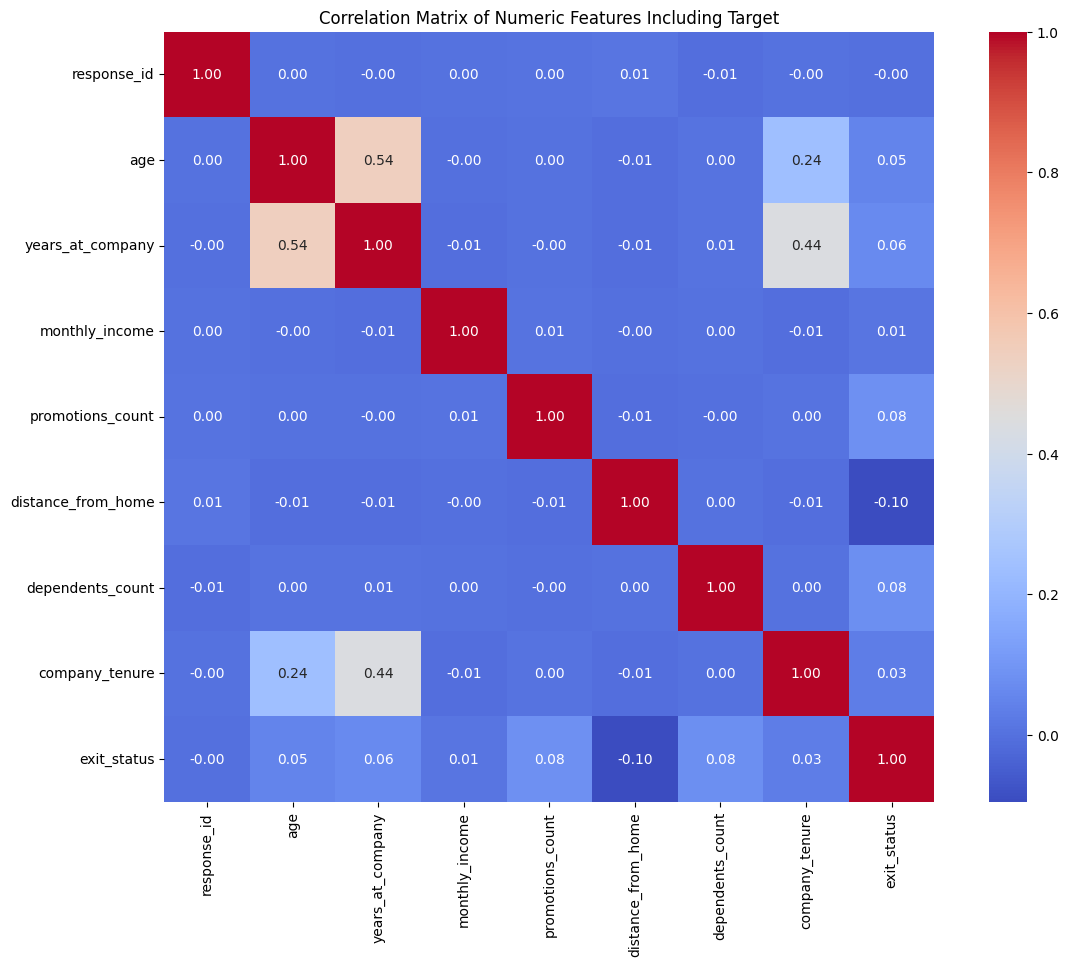

exit_status
1    31265
0    28346
Name: count, dtype: int64
response_id: 59598 unique values
age: 46 unique values
gender: 2 unique values
years_at_company: 51 unique values
job_role: 5 unique values
monthly_income: 9545 unique values
work_life_balance: 4 unique values
job_satisfaction: 4 unique values
performance_rating: 4 unique values
promotions_count: 5 unique values
overtime: 2 unique values
distance_from_home: 105 unique values
education_level: 5 unique values
marital_status: 3 unique values
dependents_count: 7 unique values
job_level: 3 unique values
company_size: 3 unique values
company_tenure: 126 unique values
remote_work: 2 unique values
leadership_opportunities: 2 unique values
innovation_opportunities: 2 unique values
company_reputation: 4 unique values
employee_recognition: 4 unique values
exit_status: 2 unique values


exit_status
1    52.448374
0    47.551626
Name: proportion, dtype: float64

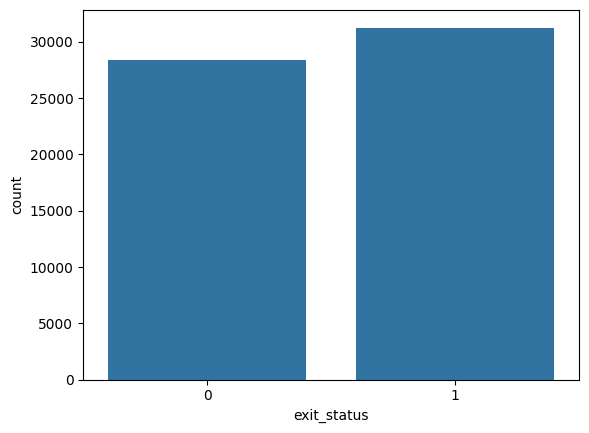

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def display_basic_info(df):
    print("First few rows of the dataset:")
    display(df.head())
    
    print("\nDataset info:")
    print(df.info())
    
    print("\nStatistical summary of numeric features:")
    display(df.describe())
    
    print("\nChecking for missing values:")
    print(df.isnull().sum())

# Step 2: Visualize Relationships
def plot_relationships(df):
    # Distribution of the target variable
    plt.figure(figsize=(8, 5))
    sns.countplot(x='exit_status', data=df)
    plt.title('Distribution of Exit Status')
    plt.show()
    
    # Boxplot for Monthly Income by Exit Status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exit_status', y='monthly_income', data=df)
    plt.title('Monthly Income by Exit Status')
    plt.show()
    
    # Boxplot for Years at Company by Exit Status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exit_status', y='years_at_company', data=df)
    plt.title('Years at Company by Exit Status')
    plt.show()
    
    # Violin plot for Age by Exit Status
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='exit_status', y='age', data=df)
    plt.title('Age by Exit Status')
    plt.show()


def plot_correlation_matrix_with_target(df, target_column):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=['number']).copy()
    
    # Include the target column (encoded as numeric)
    if target_column in df.columns:
        # Encode the target column if it's categorical
        le = LabelEncoder()
        df[target_column] = le.fit_transform(df[target_column])
        numeric_df[target_column] = df[target_column]
    
    # Compute correlation matrix
    plt.figure(figsize=(14, 10))
    correlation_matrix = numeric_df.corr()
    
    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Numeric Features Including Target')
    plt.show()


# Run the functions to explore the dataset
display_basic_info(train_df)  
plot_relationships(train_df)
plot_correlation_matrix_with_target(train_df, 'exit_status')

sns.countplot(x='exit_status', data=train_df)
print(train_df['exit_status'].value_counts())

for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()} unique values")
train_df['exit_status'].value_counts(normalize=True) * 100

Preprocessing

In [25]:
def preprocess_employee_data(train_df, test_df=None):
    # Create copies to avoid modifying original data
    train = train_df.copy()
    test = test_df.copy() if test_df is not None else None
    
    # 1. Handle Missing Values
    numeric_features = ['age', 'years_at_company', 'monthly_income', 'promotions_count',
                       'distance_from_home', 'dependents_count', 'company_tenure']
    categorical_features = ['gender', 'job_role', 'work_life_balance', 'job_satisfaction',
                          'performance_rating', 'overtime', 'education_level', 'marital_status',
                          'job_level', 'company_size', 'remote_work', 'leadership_opportunities',
                          'innovation_opportunities', 'company_reputation', 'employee_recognition']
    
    # Numeric imputer
    num_imputer = SimpleImputer(strategy='median')
    train[numeric_features] = num_imputer.fit_transform(train[numeric_features])
    if test is not None:
        test[numeric_features] = num_imputer.transform(test[numeric_features])
    
    # Categorical imputer
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train[categorical_features] = cat_imputer.fit_transform(train[categorical_features])
    if test is not None:
        test[categorical_features] = cat_imputer.transform(test[categorical_features])
    
    # 2. Feature Engineering
    # Add new features
    # train['income_per_year'] = train['monthly_income'] * 12
    train['promotion_rate'] = train['promotions_count'] / (train['years_at_company'] + 1)
    if test is not None:
        # test['income_per_year'] = test['monthly_income'] * 12
        test['promotion_rate'] = test['promotions_count'] / (test['years_at_company'] + 1)
    
    # 3. Encoding Categorical Variables
    # Initialize dictionary to store label encoders
    label_encoders = {}
    
    # Encode categorical variables
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        train[feature] = label_encoders[feature].fit_transform(train[feature])
        if test is not None:
            test[feature] = label_encoders[feature].transform(test[feature])
    
    # 4. Feature Scaling
    # Update numeric features list with new engineered features
    numeric_features += ['promotion_rate']
    
    # Scale numeric features
    scaler = StandardScaler()
    train[numeric_features] = scaler.fit_transform(train[numeric_features])
    if test is not None:
        test[numeric_features] = scaler.transform(test[numeric_features])
    
    # 5. Handle Target Variable
    if 'exit_status' in train.columns:
        target_encoder = LabelEncoder()
        y_train = target_encoder.fit_transform(train['exit_status'])
        train = train.drop('exit_status', axis=1)
    else:
        y_train = None
        target_encoder = None
    
    # 6. Drop unnecessary columns
    columns_to_drop = ['response_id']  # Add any other columns you want to drop
    train = train.drop(columns_to_drop, axis=1)
    if test is not None:
        test = test.drop(columns_to_drop, axis=1)
    
    # Create preprocessor object to store all transformers
    preprocessor = {
        'num_imputer': num_imputer,
        'cat_imputer': cat_imputer,
        'label_encoders': label_encoders,
        'scaler': scaler,
        'target_encoder': target_encoder
    }
    
    if test is not None:
        return train, test, y_train, preprocessor
    else:
        return train, y_train, preprocessor

Import train and test data and preprocess it

In [26]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
    
    # Preprocess data
X_train, X_test, y_train, preprocessor = preprocess_employee_data(train_df, test_df)
    
    # Print shapes to verify
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target shape: {y_train.shape}")

Training set shape: (59611, 23)
Test set shape: (14900, 23)
Target shape: (59611,)


XGBoost using CUDA(GPU)

In [27]:


param_grid = {
    'max_depth': [3,4,5],                   # Higher depth can improve accuracy but might increase overfitting
    'learning_rate': [0.25, 0.2],        # Adding a lower rate to ensure convergence stability
    'n_estimators': [100, 150],          # Increasing to capture complex patterns
    'min_child_weight': [5, 10],           # Testing lower values for more splits
    'subsample': [0.9, 1.0],        # Adding more granularity for feature variety
    'colsample_bytree': [0.8, 1.0],      # Testing a wider range for feature subsampling
    'gamma': [0, 0.1, 0.3],                   # Adding gamma to penalize complex trees
    'scale_pos_weight': [1, 2],               # Helps with imbalanced classes if present
}

xgb_model = XGBClassifier(tree_method='hist', device='cuda', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # n_jobs=-1 uses all cores
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.25, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.9}
Best accuracy: 0.7544748334328859


In [28]:
y_pred = grid_search.best_estimator_.predict(X_test)
prediction_mapping = {0: 'Left', 1: 'Stayed'}
y_pred_labels = [prediction_mapping[label] for label in y_pred]
# Output the predictions
# print("Predictions:", y_pred)
# f_predRF = rf_best_model.predict(X_test_scaled)
output = pd.DataFrame({'response_id': test_df['response_id'], 'exit_status': y_pred_labels})
output.to_csv('predXG8f.csv', index=False)

Desicion Tree

In [29]:



# Define parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search for Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Evaluate Decision Tree model
best_dt_model = dt_grid_search.best_estimator_
dt_y_pred = best_dt_model.predict(X_test)
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Validation Accuracy:", dt_grid_search.best_score_)
# print("Decision Tree Classification Report:\n", classification_report(y_val, dt_y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Validation Accuracy: 0.7168475672823337


Logistic Regression

In [30]:


# Logistic Regression parameter grid
lr_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # GPU supports 'l2' only
    'solver': ['lbfgs']  # Recommended for CUDA logistic regression
}

# Create Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search for Logistic Regression
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

# Evaluate Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_
lr_y_pred = best_lr_model.predict(X_train)
print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Validation Accuracy:", lr_grid_search.best_score_)
# print("Logistic Regression Classification Report:\n", classification_report(y_val, lr_y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Validation Accuracy: 0.7122846575091248


In [31]:
# Make predictions on the test set using the best Logistic Regression model
lr_y_pred = best_lr_model.predict(X_test)

# Map the predicted class labels to their corresponding text representation
prediction_mapping = {0: 'Left', 1: 'Stayed'}
lr_y_pred_labels = [prediction_mapping[label] for label in lr_y_pred]

# Create the output DataFrame and save it to a CSV file
output = pd.DataFrame({'response_id': test_df['response_id'], 'exit_status': lr_y_pred_labels})
output.to_csv('predLRf.csv', index=False)

Random Forest

In [32]:

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [120,150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1, 2]
}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Evaluate Random Forest model
best_rf_model = rf_grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_train)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Validation Accuracy:", rf_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Random Forest Validation Accuracy: 0.7434198594366415


In [33]:
# Make predictions on the test set using the best Random Forest model
rf_y_pred = best_rf_model.predict(X_test)

# Map the predicted class labels to their corresponding text representation
prediction_mapping = {0: 'Left', 1: 'Stayed'}
rf_y_pred_labels = [prediction_mapping[label] for label in rf_y_pred]

# Create the output DataFrame and save it to a CSV file
output = pd.DataFrame({'response_id': test_df['response_id'], 'exit_status': rf_y_pred_labels})
output.to_csv('predRFf.csv', index=False)